In [1]:
!pip install -U scikit-learn

^C


In [3]:
import sklearn
print(sklearn.__version__)

1.2.2


In [5]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [6]:
print(diabetes.feature_names) # 특성 10개 : ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
len(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


10

In [7]:
df_X = diabetes.data
df_y = diabetes.target

df_X.shape, df_y.shape # 10개의 특성을 가지는 442개의 데이터

((442, 10), (442,))

In [8]:
import numpy as np

X = np.array(df_X)
y = np.array(df_y)

X, y

(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
   

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331, 10), (111, 10), (331,), (111,))

In [10]:
W = np.random.randn(X_train.shape[1])
b = np.random.rand()

print(W, b)

def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

[ 0.30701047 -0.69710451 -0.03217795  0.42588264 -0.04124279 -1.70928657
 -0.50819881 -0.48494191 -0.24941325  0.5156215 ] 0.07985159722377277


In [11]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [12]:
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

In [13]:
LEARNING_RATE = 0.5
losses = []
for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 4042.1922
Iteration 200 : Loss 3485.1513
Iteration 300 : Loss 3256.6474
Iteration 400 : Loss 3135.5860
Iteration 500 : Loss 3063.9543
Iteration 600 : Loss 3019.6346
Iteration 700 : Loss 2991.5579
Iteration 800 : Loss 2973.4518
Iteration 900 : Loss 2961.5828
Iteration 1000 : Loss 2953.6756
Iteration 1100 : Loss 2948.3213
Iteration 1200 : Loss 2944.6352
Iteration 1300 : Loss 2942.0542
Iteration 1400 : Loss 2940.2152
Iteration 1500 : Loss 2938.8811
Iteration 1600 : Loss 2937.8946
Iteration 1700 : Loss 2937.1506
Iteration 1800 : Loss 2936.5775
Iteration 1900 : Loss 2936.1261
Iteration 2000 : Loss 2935.7624
Iteration 2100 : Loss 2935.4622
Iteration 2200 : Loss 2935.2087
Iteration 2300 : Loss 2934.9894
Iteration 2400 : Loss 2934.7958
Iteration 2500 : Loss 2934.6212
Iteration 2600 : Loss 2934.4611
Iteration 2700 : Loss 2934.3118
Iteration 2800 : Loss 2934.1709
Iteration 2900 : Loss 2934.0364
Iteration 3000 : Loss 2933.9069
Iteration 3100 : Loss 2933.7812
Iteration 3200 : 

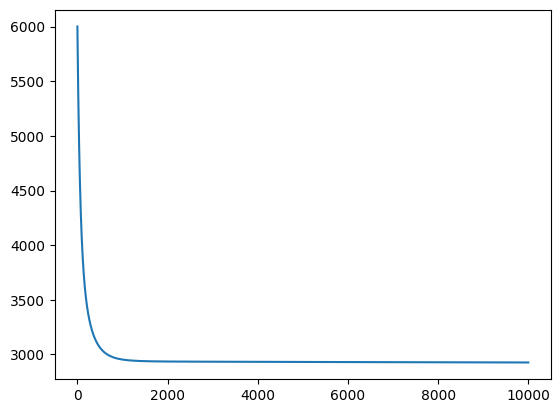

In [14]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [15]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)

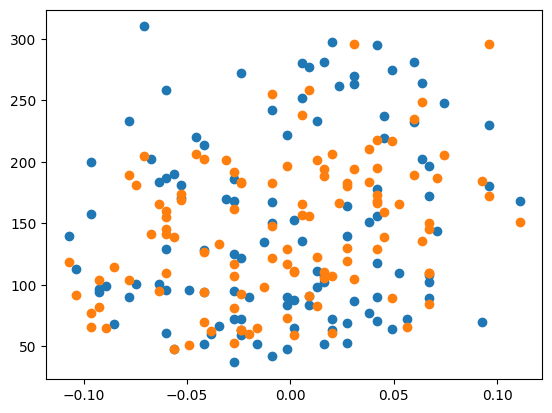

In [16]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()